In [4]:
from vis import plot_training_rewards, plot_rollout_histogram
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(f"Currently using device: {device}")


Currently using device: cuda:2


### Part 1: Train basic policy gradient agent on CartPole environment
#### Training:

Training & trained policy roll out has been processed seperately in `train_pong.py` due to long training time required. This notebook is only responsible for result presentation.

In [5]:
import ale_py
from utils import preprocess_frame

env = gym.make("ALE/Pong-v5")
obs_shape = (80, 80)
obs_dim = obs_shape[0] * obs_shape[1]
act_dim = 2

def preprocess_obs(obs):
    frame = preprocess_frame(obs)
    return torch.as_tensor(frame.flatten(), dtype=torch.float32, device=device)

def action_map(idx):
    return [2, 3][idx]  # 0->2 (RIGHT), 1->3 (LEFT)

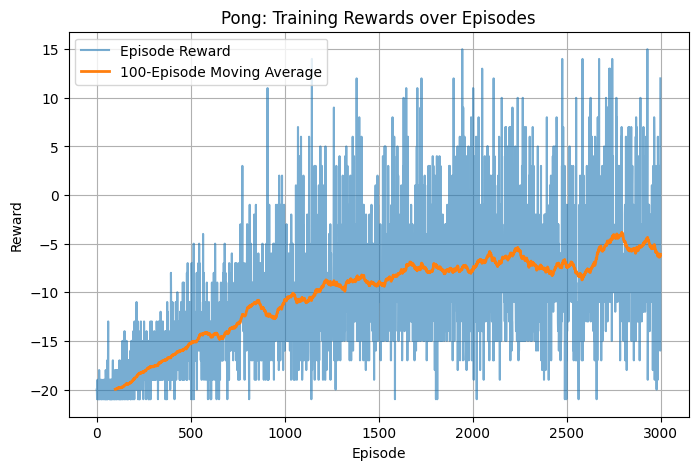

In [6]:
training_rewards = torch.load("runs/pong_lr0.001_g0.99_ep3000_h128_baselineFalse:200/rewards.pt", map_location=device)
plot_training_rewards(game_name="Pong", rewards=training_rewards)

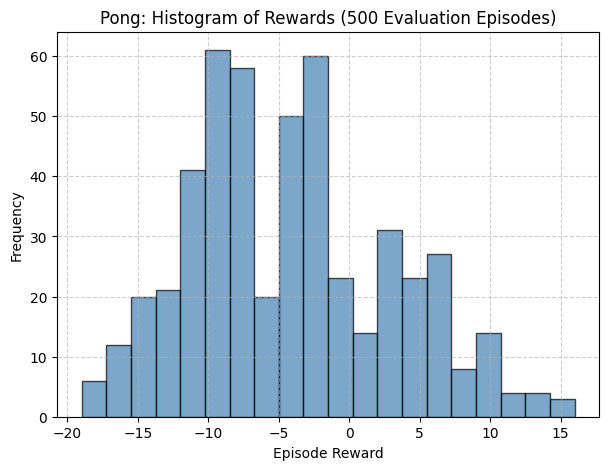

Pong: Mean reward over 500 episodes: -4.30
Pong: Std. dev. of reward: 7.12


In [12]:
rollout_rewards = torch.load("runs/pong_lr0.001_g0.99_ep3000_h128_baselineFalse:200/rollout_rewards.pt", 
                             map_location=device,
                             weights_only=False)

plot_rollout_histogram(game_name="Pong", rewards=rollout_rewards)

### Part 2: Adding moving-average baseline to the discounted reward

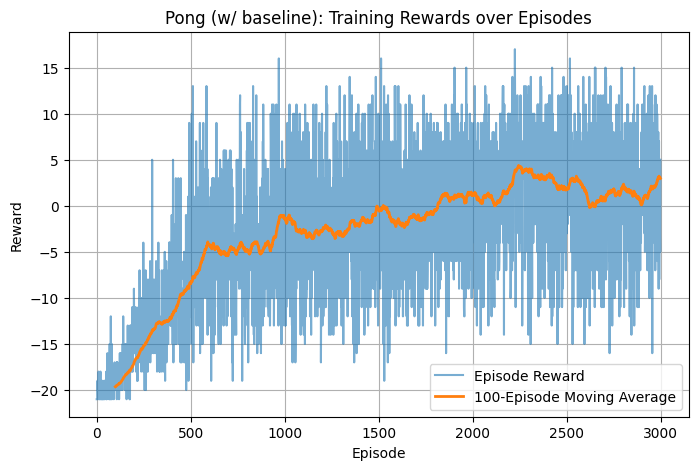

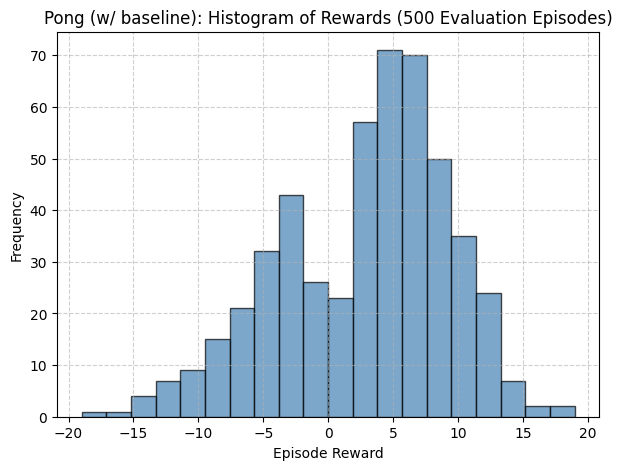

Pong (w/ baseline): Mean reward over 500 episodes: 2.75
Pong (w/ baseline): Std. dev. of reward: 6.58


In [11]:
training_rewards = torch.load("runs/pong_lr0.001_g0.99_ep3000_h128_baselineTrue:200/rewards.pt", map_location=device)
plot_training_rewards(game_name="Pong (w/ baseline)", rewards=training_rewards)
rollout_rewards = torch.load("runs/pong_lr0.001_g0.99_ep3000_h128_baselineTrue:200/rollout_rewards.pt", 
                             map_location=device,
                             weights_only=False)
plot_rollout_histogram(game_name="Pong (w/ baseline)", rewards=rollout_rewards)

### Effect of Adding the Moving Average Baseline

The graphs of the Pong game show very similar trend on the Policy Gradiant traning result before and after adding the baseline. Adding the baseline can reduce variance of episode reward as well as achieving better training results with the same training parameter. I also observed significant less training time required for model with baseline implementation than the model without it.